# Part-5 OpenCV

## Detect Simple Geometric Shape 

In [1]:
import cv2
import numpy as np

img=cv2.imread('shapes.png')
img=cv2.resize(img,(500,400))
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,thresh=cv2.threshold(img_gray,240,255,cv2.THRESH_BINARY)
contours,_=cv2.findContours(thresh,mode=cv2.RETR_TREE,method=cv2.CHAIN_APPROX_NONE)

for contour in contours: 
#Approximates the Polygonal curves with a specific precision 

        approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
        cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
        #It is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array
        x=approx.ravel()[0]
        y=approx.ravel()[1] #y coordinate
        if len(approx)==3:
            cv2.putText(img,"Triangle",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
        elif len(approx)==4:
            x,y,w,h=cv2.boundingRect(approx)
            aspect_ratio=float(w)/h
            print('Aspect_Ratio',aspect_ratio)
            if aspect_ratio>=0.95 and aspect_ratio<=1.05:
                cv2.putText(img,'Square',(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
            else:
                cv2.putText(img,'Rectangle',(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
        elif len(approx)==5:
            cv2.putText(img,'Pentagon',(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
        elif len(approx)==6:
            cv2.putText(img,'Hexagon',(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
        elif len(approx)==10:
            cv2.putText(img,"Star",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
        else:
            cv2.putText(img,"Circle",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
        


cv2.imshow('img',img)
#cv2.imshow('img',thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aspect_Ratio 1.25
Aspect_Ratio 1.9285714285714286
Aspect_Ratio 0.9433962264150944


## Image Histograms

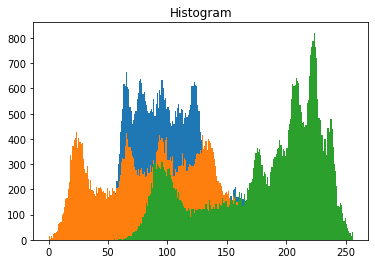

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#img=np.zeros((200,200),np.uint8) 
img=cv2.imread('lenas.png')

b,g,r=cv2.split(img)
cv2.imshow('Image',img)
cv2.imshow('b',b)
cv2.imshow('g',g)
cv2.imshow('r',r)

#plt.hist(img.ravel(), 256,[0,256])
plt.hist(b.ravel(),256,[0,256])
plt.hist(g.ravel(),256,[0,256])
plt.hist(r.ravel(),256,[0,256])
plt.title('Histogram')

plt.show()

k=cv2.waitKey(0)
if k==27:
    cv2.destroyAllWindows()

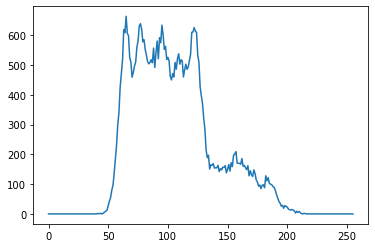

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#img=np.zeros((200,200),np.uint8) 
img=cv2.imread('lenas.png')

hist=cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
